<a href="https://colab.research.google.com/github/ashkanmosalla/Wildfire/blob/main/Wildfire_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('Training_data.csv')

In [4]:
test = pd.read_csv('Testing_data.csv')

In [5]:
train.head()

,OBJECTID,Training_fire_point,X,Y,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,aspect,road,river,pcp
0,1,1,9.779328e+05,-171014.66810,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,2,1,1.347033e+06,-80014.66811,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,3,1,9.444328e+05,-50014.66811,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,6.0,2.0,4.0,3.0
3,4,1,9.470328e+05,-50814.66811,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,5,1,9.414328e+05,-51414.66811,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0


In [6]:
train['Training_fire_point'].value_counts()

Training_fire_point
1    14812
0    13713
Name: count, dtype: int64

In [7]:
test.head()

,OBJECTID,testing_fire_Point,X,Y,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,aspect,road,river,pcp
0,1,1,1.104417e+06,-41066.374270,-219.0,4.0,5.0,3.0,4.0,5.0,4,4,5,3.0,4.0,2,4,3.0
1,2,1,2.347017e+06,-47066.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,4,1.0,4.0,0,5,4.0
2,3,1,2.353017e+06,-47366.374270,-6.0,3.0,5.0,3.0,2.0,5.0,4,5,5,1.0,4.0,0,5,4.0
3,4,1,7.265169e+05,9933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,1,4,3.0
4,5,1,7.247169e+05,6933.625731,143.0,3.0,4.0,3.0,4.0,5.0,4,3,5,3.0,3.0,0,4,3.0


In [8]:
test['testing_fire_Point'].value_counts()

testing_fire_Point
1    3708
0    3441
Name: count, dtype: int64

In [9]:
train.shape

(28525, 18)

In [10]:
test.shape

(7149, 18)

In [11]:
df_train = pd.read_csv('Training_data.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois',
                                                   'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road',
                                                    'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [14]:
df_test = pd.read_csv('Testing_data.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois',
                                                   'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road',
                                                    'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [18]:
df_train['aspect'] = df_train['aspect'].replace(6, 2)

In [19]:
df_test['aspect'] = df_test['aspect'].replace(6, 2)

In [20]:
df_train = df_train.astype(
    {
        'Wildfire': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'aspect': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [21]:
df_test = df_test.astype(
    {
        'Wildfire': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'aspect': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [22]:
df_train[df_train.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
6,7,1,2.355633e+06,-5.011467e+04,NaN,3.0,5.0,3.0,NaN,5.0,11.0,5.0,5.0,NaN,NaN,0.0,5.0,4.0
15044,15045,0,1.067970e+06,-3.218339e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,15129,0,9.084699e+05,-2.232339e+05,-46.0,NaN,5.0,4.0,2.0,5.0,11.0,1.0,5.0,2.0,3.0,0.0,2.0,3.0
15162,15163,0,1.098170e+06,-2.207339e+05,-46.0,NaN,5.0,4.0,2.0,2.0,11.0,1.0,5.0,2.0,3.0,1.0,1.0,3.0
15163,15164,0,1.098370e+06,-2.214339e+05,-46.0,NaN,5.0,4.0,2.0,2.0,11.0,1.0,5.0,2.0,4.0,1.0,1.0,3.0
15613,15614,0,1.658870e+06,-9.973389e+04,NaN,5.0,5.0,2.0,NaN,3.0,1.0,4.0,5.0,NaN,NaN,0.0,3.0,3.0
15618,15619,0,1.670270e+06,-1.042339e+05,NaN,5.0,5.0,2.0,NaN,3.0,1.0,4.0,5.0,NaN,NaN,0.0,1.0,3.0
15638,15639,0,4.105699e+05,-8.783389e+04,-46.0,NaN,5.0,4.0,4.0,2.0,4.0,1.0,5.0,2.0,4.0,0.0,2.0,2.0
15774,15775,0,4.469699e+05,-2.383389e+04,-219.0,NaN,5.0,3.0,4.0,4.0,4.0,1.0,5.0,3.0,3.0,0.0,3.0,2.0
15859,15860,0,1.694670e+06,-1.183389e+04,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0,4.0,NaN,NaN,0.0,3.0,NaN


In [23]:
df_test[df_test.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
3779,3780,0,1099276.864,-2.210352e+05,-46.0,NaN,5.0,4.0,2.0,2.0,11,1,5,2.0,4.0,1,1,3.0
3889,3890,0,1656776.864,-1.078352e+05,NaN,5.0,5.0,2.0,NaN,3.0,1,4,5,NaN,NaN,0,3,3.0
3906,3907,0,1667476.864,-8.523515e+04,NaN,5.0,5.0,2.0,NaN,3.0,1,4,5,NaN,NaN,0,2,3.0
3907,3908,0,1670876.864,-8.873515e+04,NaN,5.0,5.0,2.0,NaN,3.0,11,4,5,NaN,NaN,1,1,3.0
4234,4235,0,2236376.864,2.618648e+05,NaN,5.0,5.0,3.0,NaN,5.0,4,5,5,NaN,NaN,1,5,4.0
4517,4518,0,-1902023.136,4.328648e+05,NaN,4.0,5.0,5.0,NaN,5.0,4,4,5,NaN,NaN,1,1,4.0
4548,4549,0,-1947223.136,4.487648e+05,NaN,4.0,5.0,4.0,NaN,5.0,4,4,5,NaN,NaN,0,1,4.0
4840,4841,0,2942776.864,7.680648e+05,NaN,2.0,5.0,2.0,NaN,5.0,11,5,4,NaN,NaN,2,5,4.0
4899,4900,0,2861376.864,8.542648e+05,NaN,3.0,5.0,2.0,NaN,5.0,3,5,4,NaN,NaN,0,5,4.0
4922,4923,0,2829976.864,8.940648e+05,NaN,4.0,5.0,3.0,NaN,5.0,4,5,4,NaN,NaN,0,4,4.0


In [24]:
New_df_train = df_train.dropna()
New_df_test = df_test.dropna()

In [25]:
columns_to_drop = ['OBJECTID']
New_df_train = New_df_train.drop(columns= columns_to_drop)
New_df_test = New_df_test.drop(columns= columns_to_drop)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):

    vifs = [variance_inflation_factor(New_df_train.values, i) for i in range(New_df_train.shape[1])]
    tolerance = [1/vif for vif in vifs]

    vif_data = pd.DataFrame(index=New_df_train.columns)
    vif_data['VIF'] = vifs
    vif_data['Tolerance'] = tolerance

    return vif_data

# Calculate VIF
vif_data = calculate_vif(New_df_train)

print(vif_data)


                  VIF  Tolerance
Wildfire     4.838168   0.206690
X            3.503787   0.285405
Y           21.699731   0.046084
TWI          1.426056   0.701235
temp_july   26.158782   0.038228
temp_max    48.349064   0.020683
soilmois     9.106782   0.109808
slope       15.809214   0.063254
ndvi        21.576294   0.046347
lulc         8.944670   0.111798
dist_lake   22.144932   0.045157
evt_aug     38.087221   0.026256
elevation   18.777529   0.053255
aspect       8.952495   0.111701
dist_road   15.817948   0.063219
dist_river  24.268020   0.041206
pcp         18.342987   0.054517


<ipython-input-29-56db3dbb2689>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)


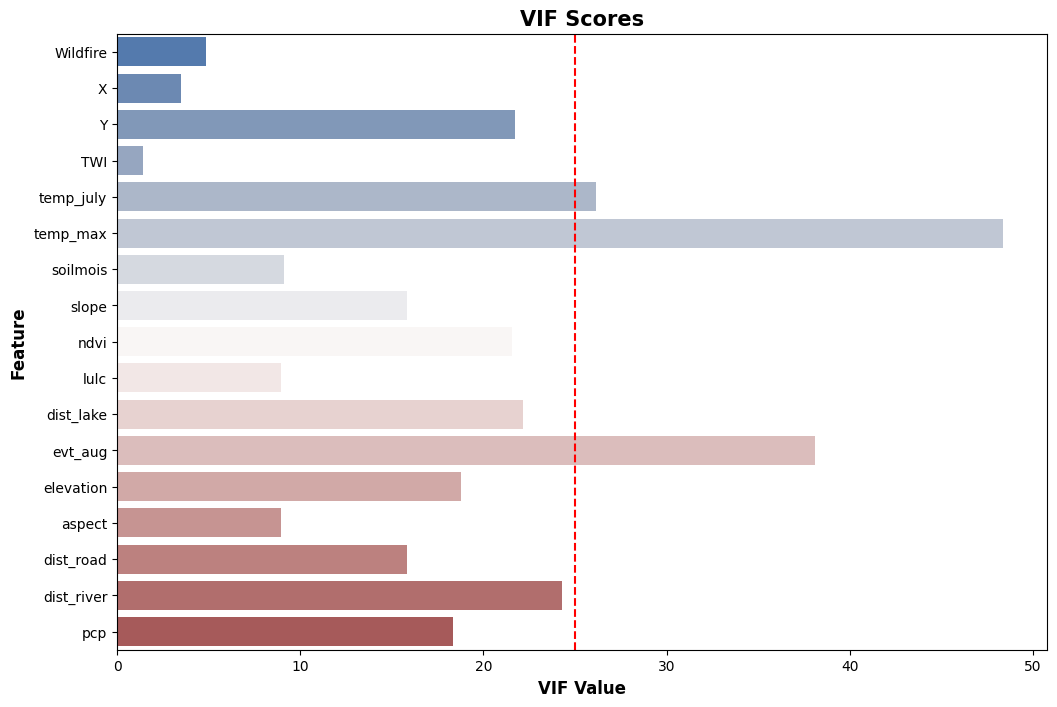

In [29]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=25, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = New_df_train[
    ['X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois', 'slope',
     'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp']
]
y = New_df_train['Wildfire']

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


       Feature  Importance    Weight
7         ndvi    0.213312  0.213312
8         lulc    0.145471  0.145471
4     temp_max    0.113106  0.113106
10     evt_aug    0.101689  0.101689
1            Y    0.087707  0.087707
3    temp_july    0.078673  0.078673
0            X    0.065596  0.065596
13   dist_road    0.055110  0.055110
15         pcp    0.049301  0.049301
11   elevation    0.025020  0.025020
5     soilmois    0.016747  0.016747
6        slope    0.015702  0.015702
9    dist_lake    0.015665  0.015665
14  dist_river    0.008484  0.008484
12      aspect    0.004408  0.004408
2          TWI    0.004007  0.004007


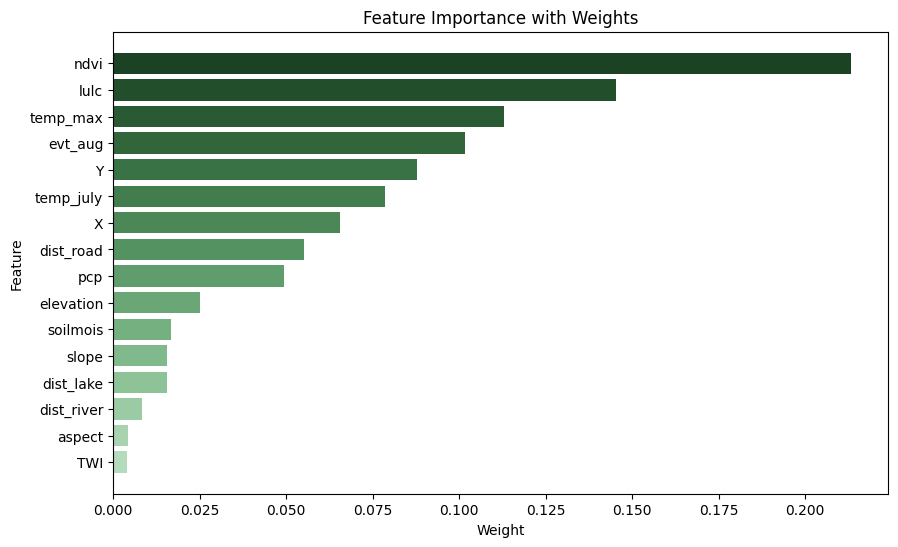

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
palette = sns.cubehelix_palette(len(feature_importance['Feature']), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Create a graph
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=palette)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Show the graph
plt.show()

# New dataframe for ML models

In [35]:
columns_to_drop = ['TWI', 'aspect', 'evt_aug', 'temp_july']
New_df_train2 = New_df_train.drop(columns = columns_to_drop)

In [37]:
New_df_train2.shape

(28494, 13)

# Encoding categorical features into suitable format

In [46]:
New_df_train2


,Wildfire,X,Y,temp_max,soilmois,slope,ndvi,lulc,dist_lake,elevation,dist_road,dist_river,pcp
0,1,9.779328e+05,-1.710147e+05,5.0,4.0,3.0,5.0,4.0,2.0,3.0,2.0,4.0,3.0
1,1,1.347033e+06,-8.001467e+04,5.0,3.0,3.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0
2,1,9.444328e+05,-5.001467e+04,5.0,3.0,2.0,5.0,4.0,4.0,3.0,2.0,4.0,3.0
3,1,9.470328e+05,-5.081467e+04,5.0,3.0,2.0,5.0,4.0,4.0,3.0,2.0,4.0,3.0
4,1,9.414328e+05,-5.141467e+04,5.0,3.0,2.0,5.0,4.0,4.0,3.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28520,0,-1.565730e+06,2.817666e+06,1.0,1.0,2.0,2.0,3.0,5.0,1.0,4.0,5.0,1.0
28521,0,-1.603130e+06,2.835066e+06,1.0,1.0,5.0,2.0,5.0,5.0,2.0,4.0,5.0,1.0
28522,0,-1.595730e+06,2.834666e+06,1.0,1.0,4.0,2.0,5.0,5.0,2.0,4.0,5.0,1.0
28523,0,-1.593430e+06,2.829566e+06,1.0,1.0,5.0,2.0,3.0,5.0,2.0,4.0,5.0,1.0


In [47]:
New_df_train

,Wildfire,X,Y,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,aspect,dist_road,dist_river,pcp
0,1,9.779328e+05,-1.710147e+05,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,4.0,2.0,4.0,3.0
1,1,1.347033e+06,-8.001467e+04,-6.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0
2,1,9.444328e+05,-5.001467e+04,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,4.0,3.0
3,1,9.470328e+05,-5.081467e+04,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
4,1,9.414328e+05,-5.141467e+04,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,5.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28520,0,-1.565730e+06,2.817666e+06,129.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,1.0,1.0,2.0,4.0,5.0,1.0
28521,0,-1.603130e+06,2.835066e+06,-6.0,1.0,1.0,1.0,5.0,2.0,5.0,5.0,1.0,2.0,2.0,4.0,5.0,1.0
28522,0,-1.595730e+06,2.834666e+06,-219.0,1.0,1.0,1.0,4.0,2.0,5.0,5.0,1.0,2.0,3.0,4.0,5.0,1.0
28523,0,-1.593430e+06,2.829566e+06,-219.0,1.0,1.0,1.0,5.0,2.0,3.0,5.0,1.0,2.0,5.0,4.0,5.0,1.0


In [48]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns to be encoded
categorical_columns = [
    'temp_max', 'soilmois', 'slope', 'ndvi', 'lulc',
    'dist_lake', 'elevation', 'aspect', 'dist_road',
    'dist_river', 'pcp'
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder and transform the training data
encoded_train = encoder.fit_transform(New_df_train[categorical_columns])
encoded_test = encoder.transform(New_df_test[categorical_columns])

# Convert the encoded features into a DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with 'X', 'Y', and 'Wildfire'
final_train_df = pd.concat([
    New_df_train[['X', 'Y', 'Wildfire']].reset_index(drop=True),
    encoded_train_df.reset_index(drop=True)
], axis=1)

final_test_df = pd.concat([
    New_df_test[['X', 'Y', 'Wildfire']].reset_index(drop=True),
    encoded_test_df.reset_index(drop=True)
], axis=1)

# Now final_train_df and final_test_df are ready for machine learning model training


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the feature matrix and target vector for training
X_train = final_train_df.drop(['Wildfire', 'X', 'Y'], axis=1)
y_train = final_train_df['Wildfire']

# Prepare the feature matrix and target vector for testing
X_test = final_test_df.drop(['Wildfire', 'X', 'Y'], axis=1)
y_test = final_test_df['Wildfire']

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy:.2%}')


Random Forest accuracy: 98.56%


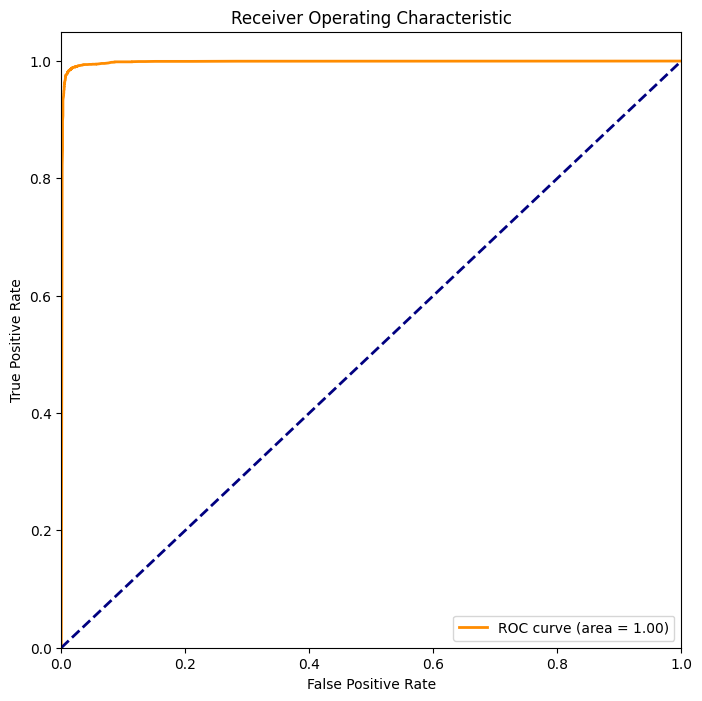

AUC: 1.00


In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = rf_model.predict_proba(X_test)[:, 1]  # We are interested in the probabilities of the positive class

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'AUC: {roc_auc:.2f}')


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Input Dimension
input_dim = X_train.shape[1]

# Define the ANN Model
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=input_dim, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the ANN Model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN Model
ann_history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the ANN Model on Test Data
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {ann_accuracy:.2f}')


Epoch 1/50
713/713 [==============================] - 9s 9ms/step - loss: 0.1184 - accuracy: 0.9553 - val_loss: 0.2775 - val_accuracy: 0.8617
Epoch 2/50
713/713 [==============================] - 4s 5ms/step - loss: 0.0637 - accuracy: 0.9772 - val_loss: 0.1200 - val_accuracy: 0.9586
Epoch 3/50
713/713 [==============================] - 4s 6ms/step - loss: 0.0542 - accuracy: 0.9809 - val_loss: 0.1236 - val_accuracy: 0.9558
Epoch 4/50
713/713 [==============================] - 6s 8ms/step - loss: 0.0450 - accuracy: 0.9841 - val_loss: 0.4476 - val_accuracy: 0.8696
Epoch 5/50
713/713 [==============================] - 4s 5ms/step - loss: 0.0415 - accuracy: 0.9855 - val_loss: 0.1581 - val_accuracy: 0.9405
Epoch 6/50
713/713 [==============================] - 2s 3ms/step - loss: 0.0366 - accuracy: 0.9864 - val_loss: 0.2804 - val_accuracy: 0.9196
Epoch 7/50
713/713 [==============================] - 2s 2ms/step - loss: 0.0345 - accuracy: 0.9878 - val_loss: 0.2079 - val_accuracy: 0.9379
Epoch 

In [54]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# CNN expects an extra dimension for channels - reshaping the data
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the CNN Model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the CNN Model on Test Data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f'CNN Test Accuracy: {cnn_accuracy:.2f}')


Epoch 1/50
713/713 [==============================] - 5s 5ms/step - loss: 0.1234 - accuracy: 0.9572 - val_loss: 0.1009 - val_accuracy: 0.9714
Epoch 2/50
713/713 [==============================] - 5s 7ms/step - loss: 0.0879 - accuracy: 0.9709 - val_loss: 0.1866 - val_accuracy: 0.9356
Epoch 3/50
713/713 [==============================] - 5s 7ms/step - loss: 0.0781 - accuracy: 0.9746 - val_loss: 0.1431 - val_accuracy: 0.9533
Epoch 4/50
713/713 [==============================] - 4s 5ms/step - loss: 0.0717 - accuracy: 0.9752 - val_loss: 0.1749 - val_accuracy: 0.9430
Epoch 5/50
713/713 [==============================] - 4s 5ms/step - loss: 0.0673 - accuracy: 0.9756 - val_loss: 0.0887 - val_accuracy: 0.9705
Epoch 6/50
713/713 [==============================] - 5s 7ms/step - loss: 0.0629 - accuracy: 0.9774 - val_loss: 0.1241 - val_accuracy: 0.9553
Epoch 7/50
713/713 [==============================] - 4s 5ms/step - loss: 0.0584 - accuracy: 0.9798 - val_loss: 0.1356 - val_accuracy: 0.9500
Epoch 

223/223 [==============================] - 3s 11ms/step


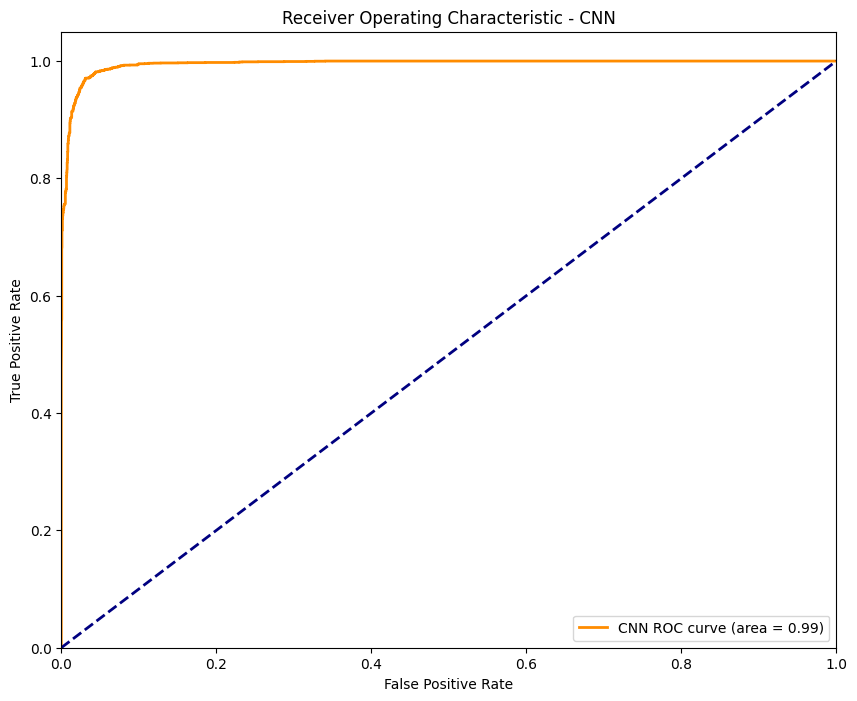

CNN AUC: 0.99


In [55]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class on test set
y_pred_probs_cnn = cnn_model.predict(X_test_reshaped).ravel()

# Compute ROC curve and ROC area
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_probs_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plotting ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNN')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'CNN AUC: {roc_auc_cnn:.2f}')


In [56]:
# Get the predicted probabilities for the test set
y_pred_probs = ann_model.predict(X_test)

# If you need a pandas DataFrame and the probabilities are in a 2D array (e.g., [[0.1], [0.9], ...])
# and you want a 1D array, you can flatten the array like this:
y_pred_probs = y_pred_probs.flatten()

# Now, y_pred_probs contains the probability of being in the positive class for each test sample
# You can create a DataFrame from it if you want:
probabilities_df = pd.DataFrame({
    'Probability': y_pred_probs
})

# If you want to add the probabilities to your test DataFrame with other information:
X_test_with_probabilities = X_test.copy()
X_test_with_probabilities['Probability'] = y_pred_probs

# Show the DataFrame
print(X_test_with_probabilities.head())


223/223 [==============================] - 2s 6ms/step
   temp_max_2.0  temp_max_3.0  temp_max_4.0  temp_max_5.0  soilmois_2.0  \
0           0.0           0.0           0.0           1.0           0.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           1.0           0.0   
3           0.0           0.0           1.0           0.0           0.0   
4           0.0           0.0           1.0           0.0           0.0   

   soilmois_3.0  soilmois_4.0  soilmois_5.0  slope_2.0  slope_3.0  ...  \
0           1.0           0.0           0.0        0.0        0.0  ...   
1           1.0           0.0           0.0        1.0        0.0  ...   
2           1.0           0.0           0.0        1.0        0.0  ...   
3           1.0           0.0           0.0        0.0        0.0  ...   
4           1.0           0.0           0.0        0.0        0.0  ...   

   dist_road_4.0  dist_river_2.0  dist_river_3.0 